In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import graphviz
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [4]:
import os
os.getcwd()

'/Users/Daniel1020/Desktop/Business Analytics/Python/Project'

In [5]:
os.chdir('/Users/Daniel1020/Downloads')

In [12]:
data=pd.read_csv('employee_retention_data.csv',parse_dates=['join_date','quit_date'])

In [13]:
data.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24702 entries, 0 to 24701
Data columns (total 7 columns):
employee_id    24702 non-null float64
company_id     24702 non-null int64
dept           24702 non-null object
seniority      24702 non-null int64
salary         24702 non-null float64
join_date      24702 non-null datetime64[ns]
quit_date      13510 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(2), object(1)
memory usage: 1.3+ MB


In [15]:
data.describe()

,employee_id,company_id,seniority,salary
count,24702.000000,24702.000000,24702.000000,24702.000000
mean,501604.403530,3.426969,14.127803,138183.345478
std,288909.026101,2.700011,8.089520,76058.184573
min,36.000000,1.000000,1.000000,17000.000000
25%,250133.750000,1.000000,7.000000,79000.000000
50%,500793.000000,2.000000,14.000000,123000.000000
75%,753137.250000,5.000000,21.000000,187000.000000
max,999969.000000,12.000000,99.000000,408000.000000


In [16]:
data.isnull().sum()

employee_id        0
company_id         0
dept               0
seniority          0
salary             0
join_date          0
quit_date      11192
dtype: int64

In [27]:
unique_date=pd.date_range(start='2011-01-24',end='2015-12-13',freq='D')
unique_company=sorted(data['company_id'].unique())

day=[]
company=[]
headcount=[]

for date in unique_date:
    for idx in unique_company:
        total_join=len(data[(data['join_date']<=date)&(data['company_id']==idx)])
        total_quit=len(data[(data['quit_date']<=date)&(data['company_id']==idx)])
        day.append(date)
        company.append(idx)
        headcount.append(total_join-total_quit)
##create table for day,employee_headcount,company_id

table=pd.DataFrame({'day':day,'company_id':company,'employee_headcount':headcount},
                  columns=['day','company_id','headcount'])

In [28]:
table.head()

,day,company_id,headcount
0,2011-01-24,1,NaN
1,2011-01-24,2,NaN
2,2011-01-24,3,NaN
3,2011-01-24,4,NaN
4,2011-01-24,5,NaN


In [29]:
##Employee Churn Analysis

In [36]:
##Seperate stay and quit data
quit_data=data[~data['quit_date'].isnull()]
stay_data=data[data['quit_date'].isnull()]

In [38]:
##Feature Engineering


In [51]:
##Total working days

quit_data['work_days']= quit_data['quit_date']-quit_data['join_date']
quit_data['work_days']=quit_data['work_days'].apply(lambda x: x.days)



/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


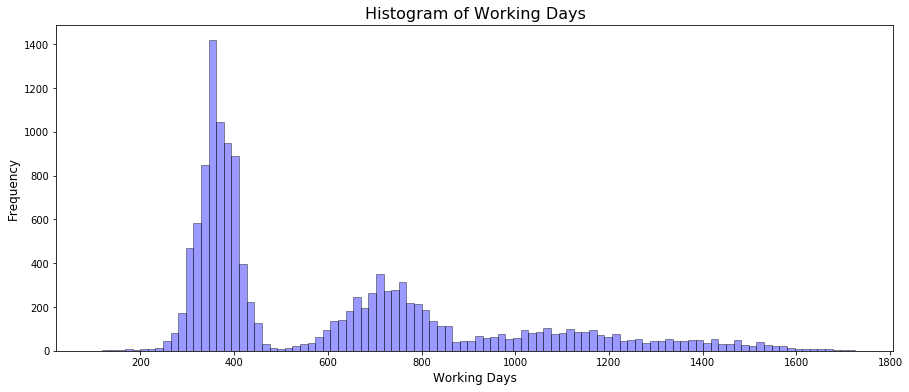

In [55]:
fig,ax=plt.subplots(figsize=(15,6))
sns.distplot(quit_data['work_days'],hist=True,kde=False,bins=100,color='blue',
             hist_kws={'edgecolor':'black'})
ax.set_title('Histogram of Working Days',fontsize=16)
ax.set_xlabel('Working Days',fontsize=12)
ax.set_ylabel('Frequency',fontsize=12)
plt.show()


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


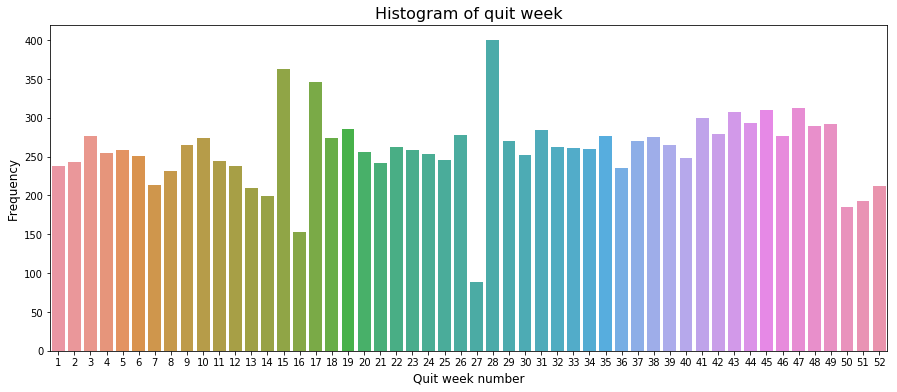

In [61]:
## week number for quitting
quit_data['quit_week']=quit_data['quit_date'].apply(lambda x: x.week)

fig,ax=plt.subplots(figsize=(15,6))
sns.countplot(quit_data['quit_week'],ax=ax)
ax.set_title('Histogram of quit week',fontsize=16)
ax.set_xlabel('Quit week number',fontsize=12)
ax.set_ylabel('Frequency',fontsize=12)
plt.show()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


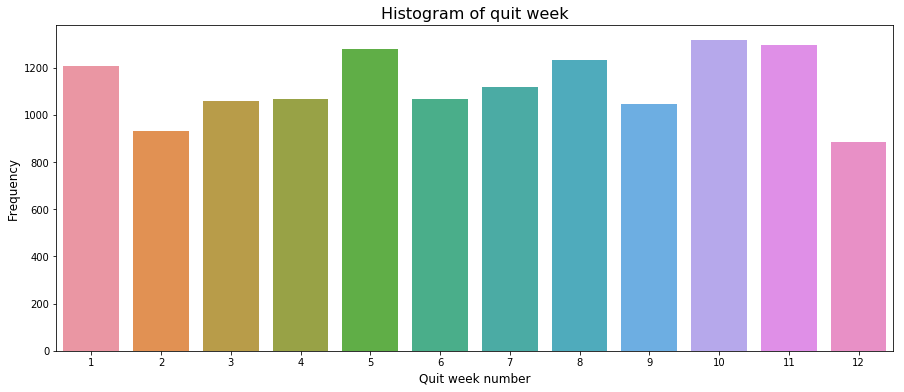

In [62]:
## month of quitting
quit_data['quit_month']=quit_data['quit_date'].apply(lambda x: x.month)

fig,ax=plt.subplots(figsize=(15,6))
sns.countplot(quit_data['quit_month'],ax=ax)
ax.set_title('Histogram of quit week',fontsize=16)
ax.set_xlabel('Quit week number',fontsize=12)
ax.set_ylabel('Frequency',fontsize=12)
plt.show()

In [63]:
## Decision Tree Model

In [76]:
## chose the subset data
stop_date=pd.to_datetime('2015-12-13')-pd.DateOffset(days=365+31)
subset=data[data['join_date']<stop_date]

quit= subset['quit_date'].isnull()|(subset['quit_date']> (subset['join_date']+pd.DateOffset(days=365+31)))
subset['quit']=1-quit.astype(int)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [77]:
subset.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,quit
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,0
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,1
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT,0
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,1
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,0


In [82]:
## label encoder
le= LabelEncoder()
train_x=subset[['company_id','seniority','salary']]
train_x['dept']=le.fit_transform(subset['dept'])
train_y=subset['quit'].values

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [84]:
clf=DecisionTreeClassifier(max_depth=3,min_samples_leaf=30,random_state=42)
clf=clf.fit(X=train_x,y=train_y)

In [89]:
##Visualization
features=list(train_x.columns)
targets=['No quit','Quit']

dot_data = tree.export_graphviz(clf,out_file=None,feature_names=features,class_names=targets,
                               filled=True,rounded=True,special_characters=True)
graph= graphviz.Source(dot_data)
graph

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

In [90]:
## feature importance

importance =sorted(zip(features,clf.feature_importances_),key=lambda x: x[1],reverse=True)
for feature, val in importance:
    print ('{0:10s}|{1:.5f}'.format(feature,val))

salary    |0.97439
seniority |0.02561
company_id|0.00000
dept      |0.00000


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


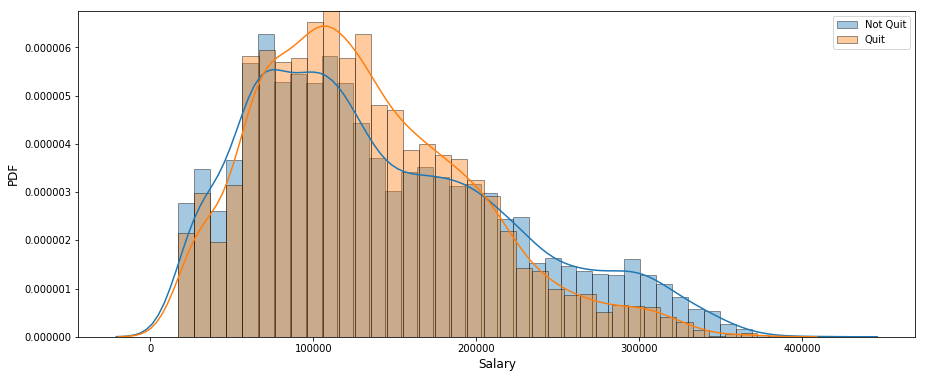

In [95]:
## visualization

fig,ax= plt.subplots(figsize=(15,6))
sns.distplot(subset[subset['quit']==0]['salary'],
            label='Not Quit',ax=ax,hist_kws={'edgecolor':'black'})

sns.distplot(subset[subset['quit']==1]['salary'],
            label='Quit',ax=ax,hist_kws={'edgecolor':'black'})

ax.set_xlabel('Salary',fontsize=12)
ax.set_ylabel('PDF',fontsize=12)
ax.legend()
plt.show()